# Identifying factors that affect sales  

# Problem Statement : The franchisee of Store B, Mr. Choe, is interested in identifying the factors that affect sales in his store and the extent to which these factors affect sales.

Seoul Retail Case
Case Study
Store B is located in an exclusive shopping district in Seoul, South Korea. Mr. Choe would like to know about the factors that affect sales in each store and the importance of each factor. Mr. Choe plans to use these identified factors for sales and operations planning in his store. 
Process 
To study the impact of the different variable for store B, we split the dataset based on each store and performed predictive modeling separately.  
The independent variables are - Store ID, Store Name, Number of Customers, Number of Items Sold, Discount, Average Sales per Customer, Average Sales per Item, Date, Day of the week, Distances from Metro Stations X and Y, Distance from the nearest main thoroughfare.
The dependent variable is Total Sales.
Linear Regression was used to study the impact of the independent variables on the dependent variable separately for every store.


Data Preparation
Feature Engineering
Categorical Variables
 Dummy coding is a commonly used method for converting a categorical input variable into a continuous variable. ‘Dummy,’ as the name suggests is a duplicate variable which represents one level of a categorical variable. Presence of a level is represented by 1 and absence is represented by 0. For every level present, one dummy variable will be created.
We used dummy coding for categorical variables like Outlook, Months and Weekdays to study the granular impact of every level. We used the python library pandas.get_dummies to achieve this.
Variable Transformation
1) IMP_Japanese_Tourists is skewed to the right, so we applied log transformation
2) Discount is skewed to the right, so we applied log transformation.
3) YenWonRatio  is skewed to the l, so we applied the square transformation

Variable Imputation
The Japanese tourist variable has many missing values. We have imputed them using Means through the Tree method. 
Rejected variables
No_of_Customers, No_of_Items, Avg_Sales_per_Customer, Avg_Sales_per_Item, Code were rejected since they do not convey any impactful insight as a predictor. 
Distance_from_Main_Street_Meter, Distance_from_Station_X_Meter,Distance_from_Station_Y_Meter were rejected for Store B. 


In [3]:
import pandas as pd 
from pandas import DataFrame, Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Loading Seoul data set 

In [5]:
korea_df = pd.read_csv('C:/Users/marga/Noteboooks/.ipynb_checkpoints/korea_data.csv', low_memory = False)

In [6]:
korea_df.head()

,Code,Store Name,# of Customers,# of Items,Total Sales,Discount,Avg Sales per Customer,Avg Sales per Item,Date,Month,...,Distance from Station X(Feet),Distance from Station Y(Meter),Distance from Station Y(Feet),Distance from Main Street(Meter),Distance from Main Street(Feet),YenWonRatio,Holiday,ActualHighTemp,Outlook,Japanese Tourists
0,20002,Store A,289,2528,19579200,0,67748,7745,9/1/2011,9,...,820,500,1640,220,722,,0,87,NaN,NaN
1,20002,Store A,230,2404,20031700,0,87094,8333,9/2/2011,9,...,820,500,1640,220,722,13.83,0,89,NaN,NaN
2,20002,Store A,244,2018,20681800,0,84761,10249,9/3/2011,9,...,820,500,1640,220,722,13.83,0,87,Cloudy,NaN
3,20002,Store A,230,1875,21673500,0,94233,11559,9/4/2011,9,...,820,500,1640,220,722,13.85,0,84,Cloudy,NaN
4,20002,Store A,306,2327,21652200,0,70759,9305,9/5/2011,9,...,820,500,1640,220,722,13.85,0,82,Sunny,NaN


What are the unique store names?

In [7]:
korea_df['Store Name'].unique()

array(['Store A', 'Store B', 'Store C', 'Store D', 'Store E'], dtype=object)

We have 5 stores, lets filter for only Store B

In [8]:
korea_df.columns

Index(['Code', 'Store Name', '# of Customers', '# of Items', 'Total Sales',
       'Discount', 'Avg Sales per Customer', 'Avg Sales per Item', 'Date',
       'Month', 'Year', 'Weekday', 'Distance from Station X(Meter)',
       'Distance from Station X(Feet)', 'Distance from Station Y(Meter)',
       'Distance from Station Y(Feet)', 'Distance from Main Street(Meter)',
       'Distance from Main Street(Feet)', 'YenWonRatio', 'Holiday',
       'ActualHighTemp', 'Outlook', 'Japanese Tourists'],
      dtype='object')

In [9]:
is_storeB = korea_df['Store Name'] == 'Store B'

In [10]:
is_storeB.value_counts()

False    1984
True      563
Name: Store Name, dtype: int64

In [11]:
korea_storeB = korea_df[is_storeB]
print(korea_storeB.shape)

(563, 23)


We have successfully filtered pandas dataframe based on values of a colum. Here all the values of the variable Store Name will be Store B 

In [12]:
korea_storeB.head()

,Code,Store Name,# of Customers,# of Items,Total Sales,Discount,Avg Sales per Customer,Avg Sales per Item,Date,Month,...,Distance from Station X(Feet),Distance from Station Y(Meter),Distance from Station Y(Feet),Distance from Main Street(Meter),Distance from Main Street(Feet),YenWonRatio,Holiday,ActualHighTemp,Outlook,Japanese Tourists
469,20288,Store B,257,1474,8974800,0,34921,6089,9/1/2011,9,...,591,550,1804,230,755,13.93,0,87,NaN,NaN
470,20288,Store B,260,1769,12861500,0,49467,7270,9/2/2011,9,...,591,550,1804,230,755,13.83,0,89,NaN,NaN
471,20288,Store B,196,1383,10509400,0,53619,7599,9/3/2011,9,...,591,550,1804,230,755,13.83,0,87,Cloudy,NaN
472,20288,Store B,171,1004,7741700,0,45273,7711,9/4/2011,9,...,591,550,1804,230,755,13.85,0,84,Cloudy,NaN
473,20288,Store B,184,1295,11250500,0,61144,8688,9/5/2011,9,...,591,550,1804,230,755,13.85,0,82,Sunny,NaN


In [13]:
#Checking to see the unique values of store name contains only store B

In [14]:
korea_storeB['Store Name'].unique()

array(['Store B'], dtype=object)

Checking for the unique values of 'Outlook' column

In [15]:
korea_storeB['Outlook'].unique()

array([nan, 'Cloudy', 'Sunny', 'Rainy', 'Snowy', 'cloudy', 'rainy'], dtype=object)

Here we can see that the values are unstandardised. Lets make cloudy = Cloudy and rainy = Rainy to ensure the data quality

In [16]:
korea_storeB['Outlook'] = korea_storeB['Outlook'].replace(['rainy'], 'Rainy')


C:\Users\marga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
korea_storeB['Outlook'].unique()
#Here we can see that 'rainy' has successfully been replaced by 'Rainy'

array([nan, 'Cloudy', 'Sunny', 'Rainy', 'Snowy', 'cloudy'], dtype=object)

In [18]:
korea_storeB['Outlook'] = korea_storeB['Outlook'].replace(['cloudy'], 'Cloudy')

C:\Users\marga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
korea_storeB['Outlook'].unique()
#Here we can see that 'cloudy' has successfully been replaced by 'Cloudy'

array([nan, 'Cloudy', 'Sunny', 'Rainy', 'Snowy'], dtype=object)

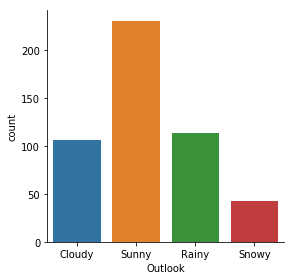

In [20]:
sns.factorplot("Outlook",data=korea_storeB, kind = "count")

Here we can see that the count of Sunny days is more than that of cloudy, rainy or snowy days

Lets now have a look at the distribution of Japanese tourists in the dataset. Since its a continuous dataset, lets use a histogram to represent this.

In [21]:
histo = korea_storeB['Japanese Tourists']

In [22]:
korea_storeB.head()

,Code,Store Name,# of Customers,# of Items,Total Sales,Discount,Avg Sales per Customer,Avg Sales per Item,Date,Month,...,Distance from Station X(Feet),Distance from Station Y(Meter),Distance from Station Y(Feet),Distance from Main Street(Meter),Distance from Main Street(Feet),YenWonRatio,Holiday,ActualHighTemp,Outlook,Japanese Tourists
469,20288,Store B,257,1474,8974800,0,34921,6089,9/1/2011,9,...,591,550,1804,230,755,13.93,0,87,NaN,NaN
470,20288,Store B,260,1769,12861500,0,49467,7270,9/2/2011,9,...,591,550,1804,230,755,13.83,0,89,NaN,NaN
471,20288,Store B,196,1383,10509400,0,53619,7599,9/3/2011,9,...,591,550,1804,230,755,13.83,0,87,Cloudy,NaN
472,20288,Store B,171,1004,7741700,0,45273,7711,9/4/2011,9,...,591,550,1804,230,755,13.85,0,84,Cloudy,NaN
473,20288,Store B,184,1295,11250500,0,61144,8688,9/5/2011,9,...,591,550,1804,230,755,13.85,0,82,Sunny,NaN


In [23]:
korea_storeB.dtypes

Code                                 int64
Store Name                          object
# of Customers                       int64
# of Items                           int64
Total Sales                          int64
Discount                             int64
Avg Sales per Customer               int64
Avg Sales per Item                   int64
Date                                object
Month                                int64
Year                                 int64
Weekday                             object
Distance from Station X(Meter)       int64
Distance from Station X(Feet)        int64
Distance from Station Y(Meter)       int64
Distance from Station Y(Feet)        int64
Distance from Main Street(Meter)     int64
Distance from Main Street(Feet)      int64
YenWonRatio                         object
Holiday                              int64
ActualHighTemp                       int64
Outlook                             object
Japanese Tourists                   object
dtype: obje

Here we can see that Japanese Tourists are of the type 'object', and lets convert this into the type 'float'

In [24]:
seri_JapanTourists= pd.Series(korea_storeB['Japanese Tourists'])

In [25]:
korea_storeB['Japanese Tourists'] = pd.to_numeric(seri_JapanTourists, errors = 'coerce')

C:\Users\marga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
korea_storeB.dtypes

Code                                  int64
Store Name                           object
# of Customers                        int64
# of Items                            int64
Total Sales                           int64
Discount                              int64
Avg Sales per Customer                int64
Avg Sales per Item                    int64
Date                                 object
Month                                 int64
Year                                  int64
Weekday                              object
Distance from Station X(Meter)        int64
Distance from Station X(Feet)         int64
Distance from Station Y(Meter)        int64
Distance from Station Y(Feet)         int64
Distance from Main Street(Meter)      int64
Distance from Main Street(Feet)       int64
YenWonRatio                          object
Holiday                               int64
ActualHighTemp                        int64
Outlook                              object
Japanese Tourists               

Similarly, converting YenWonRatio to 'float' type since it is of the type 'object'

In [27]:
seri_YenWonRatio= pd.Series(korea_storeB['YenWonRatio'])

In [28]:
korea_storeB['YenWonRatio'] = pd.to_numeric(seri_YenWonRatio, errors = 'coerce')

C:\Users\marga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
korea_storeB['YenWonRatio'].dtypes

dtype('float64')

Thus we have successfully converted 'YenWonRatio' and 'Japanese Tourists' into the type 'float'

Lets now check how many null values are there in Japanese tourists and their max and min

In [31]:
korea_storeB['Japanese Tourists'].isnull().sum()


251

In [135]:
korea_storeB['Japanese Tourists'].max()

18114.0

In [136]:
korea_storeB['Japanese Tourists'].min()

841.0

Lets handle the null values by replacing them with the mean of the values of 'Japanese Tourists'. While taking the mean it is important to note that it excludes NA/null values when computing the results

In [137]:
korea_storeB['Japanese Tourists'].mean()

3160.6570512820513

Lets replace the null values with the mean = 3160.65705128201513 using the fillna() method

In [32]:
korea_storeB['Japanese Tourists'] = korea_storeB['Japanese Tourists'].fillna(korea_storeB['Japanese Tourists'].mean())

C:\Users\marga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
korea_storeB['Japanese Tourists'].isnull().sum()

0

Thus we can see above that the count of null values is 0 and that we have replaced all the above null values with the mean of the value of Japanese Tourists

In [34]:
korea_storeB['YenWonRatio'].isnull().sum()

0

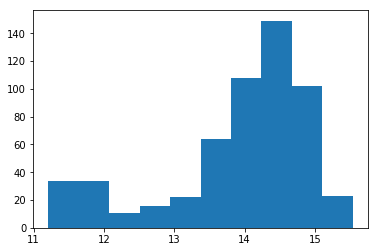

In [35]:
plt.hist(korea_storeB['YenWonRatio'])
plt.show()

Lets use square transforamtion to reduce left skewness of the 'YenWonRatio'

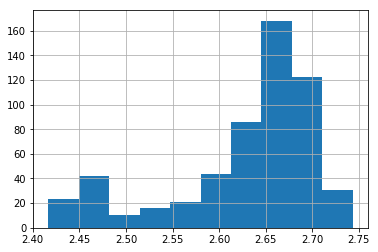

In [36]:
korea_storeB['YenWonRatio'].apply(np.log).hist()

plt.show()

In [144]:
korea_storeB['YenWonRatio'] = np.sqrt(korea_storeB['YenWonRatio'])

C:\Users\marga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


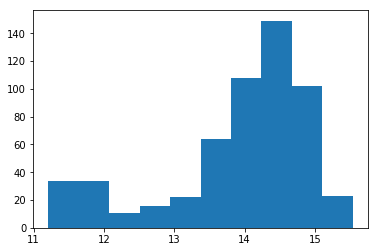

In [37]:
plt.hist(korea_storeB['YenWonRatio'])
plt.show()

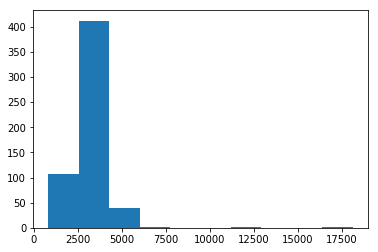

In [38]:
plt.hist(korea_storeB['Japanese Tourists'])
plt.show()

'Japanese Tourists' is right skewed and right skewness can be handled by a logarithmic transformation

In [39]:
korea_storeB['Japanese Tourists'] = np.log(korea_storeB['Japanese Tourists'])

C:\Users\marga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


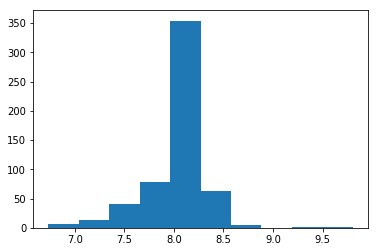

In [40]:
plt.hist(korea_storeB['Japanese Tourists'])
plt.show()

In [109]:
korea_storeB['Japanese Tourists'].min()

6.7345916599729483

In [110]:
korea_storeB['Japanese Tourists'].max()

9.8044403989348936

In [41]:
korea_storeB.head()

,Code,Store Name,# of Customers,# of Items,Total Sales,Discount,Avg Sales per Customer,Avg Sales per Item,Date,Month,...,Distance from Station X(Feet),Distance from Station Y(Meter),Distance from Station Y(Feet),Distance from Main Street(Meter),Distance from Main Street(Feet),YenWonRatio,Holiday,ActualHighTemp,Outlook,Japanese Tourists
469,20288,Store B,257,1474,8974800,0,34921,6089,9/1/2011,9,...,591,550,1804,230,755,13.93,0,87,NaN,8.058535
470,20288,Store B,260,1769,12861500,0,49467,7270,9/2/2011,9,...,591,550,1804,230,755,13.83,0,89,NaN,8.058535
471,20288,Store B,196,1383,10509400,0,53619,7599,9/3/2011,9,...,591,550,1804,230,755,13.83,0,87,Cloudy,8.058535
472,20288,Store B,171,1004,7741700,0,45273,7711,9/4/2011,9,...,591,550,1804,230,755,13.85,0,84,Cloudy,8.058535
473,20288,Store B,184,1295,11250500,0,61144,8688,9/5/2011,9,...,591,550,1804,230,755,13.85,0,82,Sunny,8.058535


In [42]:
dummy = pd.get_dummies(korea_storeB['Outlook'])
dummy.head()

,Cloudy,Rainy,Snowy,Sunny
469,0,0,0,0
470,0,0,0,0
471,1,0,0,0
472,1,0,0,0
473,0,0,0,1


In [43]:
korea_storeB = pd.concat([korea_storeB, dummy], axis = 1)
korea_storeB.head()

,Code,Store Name,# of Customers,# of Items,Total Sales,Discount,Avg Sales per Customer,Avg Sales per Item,Date,Month,...,Distance from Main Street(Feet),YenWonRatio,Holiday,ActualHighTemp,Outlook,Japanese Tourists,Cloudy,Rainy,Snowy,Sunny
469,20288,Store B,257,1474,8974800,0,34921,6089,9/1/2011,9,...,755,13.93,0,87,NaN,8.058535,0,0,0,0
470,20288,Store B,260,1769,12861500,0,49467,7270,9/2/2011,9,...,755,13.83,0,89,NaN,8.058535,0,0,0,0
471,20288,Store B,196,1383,10509400,0,53619,7599,9/3/2011,9,...,755,13.83,0,87,Cloudy,8.058535,1,0,0,0
472,20288,Store B,171,1004,7741700,0,45273,7711,9/4/2011,9,...,755,13.85,0,84,Cloudy,8.058535,1,0,0,0
473,20288,Store B,184,1295,11250500,0,61144,8688,9/5/2011,9,...,755,13.85,0,82,Sunny,8.058535,0,0,0,1


In [44]:
korea_storeB.columns

Index(['Code', 'Store Name', '# of Customers', '# of Items', 'Total Sales',
       'Discount', 'Avg Sales per Customer', 'Avg Sales per Item', 'Date',
       'Month', 'Year', 'Weekday', 'Distance from Station X(Meter)',
       'Distance from Station X(Feet)', 'Distance from Station Y(Meter)',
       'Distance from Station Y(Feet)', 'Distance from Main Street(Meter)',
       'Distance from Main Street(Feet)', 'YenWonRatio', 'Holiday',
       'ActualHighTemp', 'Outlook', 'Japanese Tourists', 'Cloudy', 'Rainy',
       'Snowy', 'Sunny'],
      dtype='object')

In [45]:
dummy_week = pd.get_dummies(korea_storeB['Weekday'])
dummy_week.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
469,0,0,0,0,1,0,0
470,1,0,0,0,0,0,0
471,0,0,1,0,0,0,0
472,0,0,0,1,0,0,0
473,0,1,0,0,0,0,0


In [46]:
korea_storeB = pd.concat([korea_storeB, dummy_week], axis = 1)
korea_storeB.head()

,Code,Store Name,# of Customers,# of Items,Total Sales,Discount,Avg Sales per Customer,Avg Sales per Item,Date,Month,...,Rainy,Snowy,Sunny,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
469,20288,Store B,257,1474,8974800,0,34921,6089,9/1/2011,9,...,0,0,0,0,0,0,0,1,0,0
470,20288,Store B,260,1769,12861500,0,49467,7270,9/2/2011,9,...,0,0,0,1,0,0,0,0,0,0
471,20288,Store B,196,1383,10509400,0,53619,7599,9/3/2011,9,...,0,0,0,0,0,1,0,0,0,0
472,20288,Store B,171,1004,7741700,0,45273,7711,9/4/2011,9,...,0,0,0,0,0,0,1,0,0,0
473,20288,Store B,184,1295,11250500,0,61144,8688,9/5/2011,9,...,0,0,1,0,1,0,0,0,0,0


In [47]:
dummy_month = pd.get_dummies(korea_storeB['Month'])
dummy_month.head()

,1,2,3,4,5,6,7,8,9,10,11,12
469,0,0,0,0,0,0,0,0,1,0,0,0
470,0,0,0,0,0,0,0,0,1,0,0,0
471,0,0,0,0,0,0,0,0,1,0,0,0
472,0,0,0,0,0,0,0,0,1,0,0,0
473,0,0,0,0,0,0,0,0,1,0,0,0


In [48]:
dummy_month = dummy_month.rename(columns={1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 5: 'May',
                            6: 'June', 7: 'July', 8: 'Aug', 9:'Sept', 10 :'Oct',
                            11: 'Nov', 12: 'Dec'})

In [49]:
dummy_month.head()

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
469,0,0,0,0,0,0,0,0,1,0,0,0
470,0,0,0,0,0,0,0,0,1,0,0,0
471,0,0,0,0,0,0,0,0,1,0,0,0
472,0,0,0,0,0,0,0,0,1,0,0,0
473,0,0,0,0,0,0,0,0,1,0,0,0


In [50]:
korea_storeB['Month'].dtypes

dtype('int64')

In [51]:
korea_storeB = pd.concat([korea_storeB, dummy_month], axis = 1)
korea_storeB.tail()

,Code,Store Name,# of Customers,# of Items,Total Sales,Discount,Avg Sales per Customer,Avg Sales per Item,Date,Month,...,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
1027,20288,Store B,105,687,5273500,0,50224,7676,3/12/2013,3,...,1,0,0,0,0,0,0,0,0,0
1028,20288,Store B,94,598,4099000,0,43606,6855,3/13/2013,3,...,1,0,0,0,0,0,0,0,0,0
1029,20288,Store B,120,848,5519140,1889960,45993,6508,3/14/2013,3,...,1,0,0,0,0,0,0,0,0,0
1030,20288,Store B,170,2051,10999960,3807440,64706,5363,3/15/2013,3,...,1,0,0,0,0,0,0,0,0,0
1031,20288,Store B,183,1628,8645680,2989520,47244,5311,3/16/2013,3,...,1,0,0,0,0,0,0,0,0,0


In [52]:
korea_storeB_droppedColumns = korea_storeB.drop(['Month', 'Weekday', 'Outlook'], axis = 1)

In [53]:
korea_storeB_droppedColumns.columns

Index(['Code', 'Store Name', '# of Customers', '# of Items', 'Total Sales',
       'Discount', 'Avg Sales per Customer', 'Avg Sales per Item', 'Date',
       'Year', 'Distance from Station X(Meter)',
       'Distance from Station X(Feet)', 'Distance from Station Y(Meter)',
       'Distance from Station Y(Feet)', 'Distance from Main Street(Meter)',
       'Distance from Main Street(Feet)', 'YenWonRatio', 'Holiday',
       'ActualHighTemp', 'Japanese Tourists', 'Cloudy', 'Rainy', 'Snowy',
       'Sunny', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Jan', 'Feb', 'March', 'April', 'May', 'June',
       'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
      dtype='object')

# Feature Importance

In [54]:
#feature names as a list

col = korea_storeB_droppedColumns.columns
print(col)

Index(['Code', 'Store Name', '# of Customers', '# of Items', 'Total Sales',
       'Discount', 'Avg Sales per Customer', 'Avg Sales per Item', 'Date',
       'Year', 'Distance from Station X(Meter)',
       'Distance from Station X(Feet)', 'Distance from Station Y(Meter)',
       'Distance from Station Y(Feet)', 'Distance from Main Street(Meter)',
       'Distance from Main Street(Feet)', 'YenWonRatio', 'Holiday',
       'ActualHighTemp', 'Japanese Tourists', 'Cloudy', 'Rainy', 'Snowy',
       'Sunny', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Jan', 'Feb', 'March', 'April', 'May', 'June',
       'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'],
      dtype='object')


Dropping the features that are not very important. Howver, here I am dropping other columns which are quite intutive that may affect the sales directly like '#of Customers' and '# of items'. These features are quite obvious that increase the total sales. Hence dropping them. This gives us a better idea on what other features tend to affect sales

In [55]:
#y includes our labels and x includes our features
list = ['Code', '# of Customers','# of Items', 'Total Sales','Store Name', 'Avg Sales per Customer', 'Avg Sales per Item', 'Date',
        'Year', 'Distance from Station X(Meter)', 'Distance from Station X(Feet)', 'Distance from Station Y(Meter)',
        'Distance from Station Y(Feet)', 'Distance from Main Street(Meter)', 'Distance from Main Street(Feet)']
x = korea_storeB_droppedColumns.drop(list,axis = 1 )

y = korea_storeB_droppedColumns['Total Sales']
x.head()

,Discount,YenWonRatio,Holiday,ActualHighTemp,Japanese Tourists,Cloudy,Rainy,Snowy,Sunny,Friday,...,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
469,0,13.93,0,87,8.058535,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
470,0,13.83,0,89,8.058535,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
471,0,13.83,0,87,8.058535,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
472,0,13.85,0,84,8.058535,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
473,0,13.85,0,82,8.058535,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


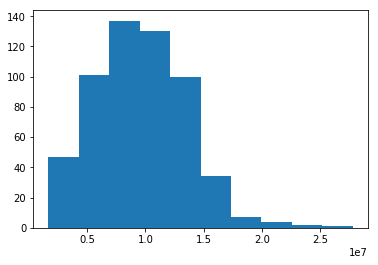

In [56]:
plt.hist(y)
plt.show()

Here we can see the distribution of our total sales

What if we want to observe all correlation between features? Yes, you are right. The answer is heatmap that is old but powerful plot method.

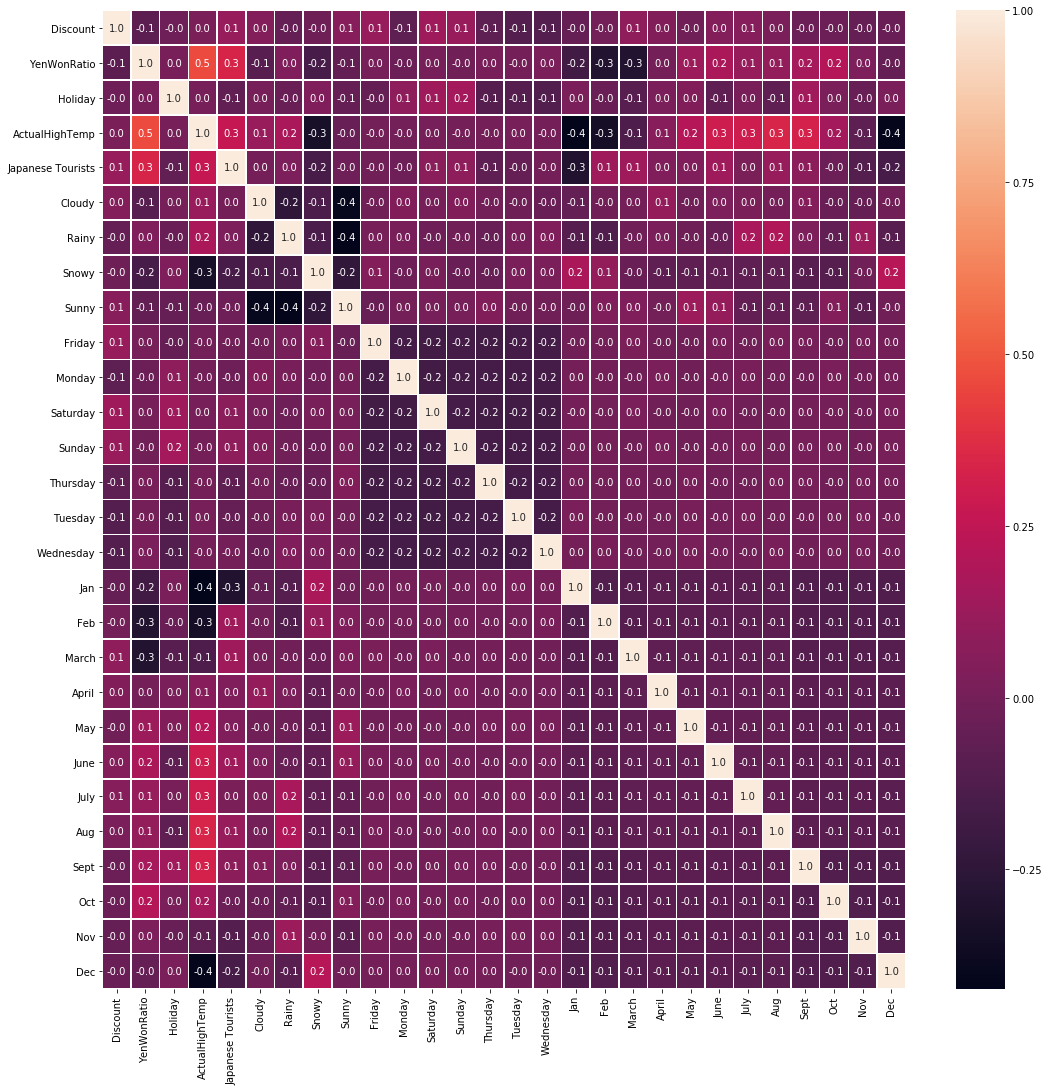

In [57]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

From the heat map above we can see that '# of customers' and '# of items' are correlated with 'Total Sales' with a correlation coefficient equivalent to 0.8

Therefore lets eliminate '# of customers' and '# of items' and lets use random forest and find accuracy according to chosen features.

In [58]:
drop_list1 = ['# of customers','# of items']
x_1 = x.drop(drop_list1,axis = 1 )        
x_1.head()

ValueError: labels ['# of customers' '# of items'] not contained in axis

Lets find the next highest predictors using random forest

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)




In [60]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for Discount is 0.5471379705052452
The coefficient for YenWonRatio is 1406124.0757384563
The coefficient for Holiday is 126903.4295995888
The coefficient for ActualHighTemp is 25999.602810848504
The coefficient for Japanese Tourists is 3038652.447213405
The coefficient for Cloudy is 1069540.8849843193
The coefficient for Rainy is 1447452.9720010161
The coefficient for Snowy is 1173267.1010915102
The coefficient for Sunny is 1526816.4498459657
The coefficient for Friday is -55152.20215449331
The coefficient for Monday is 821357.8300807569
The coefficient for Saturday is 1251223.0646047762
The coefficient for Sunday is 1138333.5511787292
The coefficient for Thursday is -700533.2829038582
The coefficient for Tuesday is -969739.4606028299
The coefficient for Wednesday is -1485489.5002032567
The coefficient for Jan is -621560.0082526908
The coefficient for Feb is -918670.8584981562
The coefficient for March is 1202184.4492842394
The coefficient for April is 452608.6622842396

In [62]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -37119396.84280116


# Scoring Model

A common method of measuring the accuracy of regression models is to use the R squared statistic

 R2 can be determined using our test set and the model’s score method.

In [63]:
regression_model.score(x_test, y_test)

0.47605648834640213

So in our model, 47.61% of the variability in Y can be explained using X

We can also get the mean squared error using scikit-learn’s mean_squared_error method and comparing the prediction for the test data set (data not used for training) with the ground truth for the data test set:

In [64]:
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(x_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

9083192244837.3008

In [65]:
import math

math.sqrt(regression_model_mse)

3013833.4799449854

So we are an average of 3013458.44 Won away from the ground truth Won total sales when making predictions on our test set.

In [79]:
from matplotlib import pyplot

In [66]:
sorted(regression_model.coef_)

[-1485489.5002032567,
 -1368142.0748197483,
 -1238796.1707144135,
 -969739.46060282993,
 -918670.85849815619,
 -700533.28290385823,
 -621560.00825269078,
 -55152.202154493309,
 -30545.566444642376,
 0.54713797050524515,
 25999.602810848504,
 94791.854046862107,
 126903.4295995888,
 271294.70806923439,
 452608.66228423966,
 591050.92743787542,
 591448.04779245809,
 821357.83008075692,
 974336.02981415438,
 1069540.8849843193,
 1138333.5511787292,
 1173267.1010915102,
 1202184.4492842394,
 1251223.0646047762,
 1406124.0757384563,
 1447452.9720010161,
 1526816.4498459657,
 3038652.4472134048]

In [107]:

a = []
c = []
for idx, col_name in enumerate(x_train.columns):
    sorted_coefficients = regression_model.coef_[idx]
    a.append(regression_model.coef_[idx])
    c.append(col_name)



['Discount', 'YenWonRatio', 'Holiday', 'ActualHighTemp', 'Japanese Tourists', 'Cloudy', 'Rainy', 'Snowy', 'Sunny', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'] [0.54713797050524515, 1406124.0757384563, 126903.4295995888, 25999.602810848504, 3038652.4472134048, 1069540.8849843193, 1447452.9720010161, 1173267.1010915102, 1526816.4498459657, -55152.202154493309, 821357.83008075692, 1251223.0646047762, 1138333.5511787292, -700533.28290385823, -969739.46060282993, -1485489.5002032567, -621560.00825269078, -918670.85849815619, 1202184.4492842394, 452608.66228423966, 591448.04779245809, -1238796.1707144135, -1368142.0748197483, 974336.02981415438, 591050.92743787542, 94791.854046862107, -30545.566444642376, 271294.70806923439]


In [113]:
percentile_list = pd.DataFrame(
    {'Columns': c,
     'Values': a,
    })

percentile_list.head()



,Columns,Values
0,Discount,5.471380e-01
1,YenWonRatio,1.406124e+06
2,Holiday,1.269034e+05
3,ActualHighTemp,2.599960e+04
4,Japanese Tourists,3.038652e+06


In [111]:
test = percentile_list.sort_values('Values', ascending=False)

In [115]:
test

,Columns,Values
4,Japanese Tourists,3.038652e+06
8,Sunny,1.526816e+06
6,Rainy,1.447453e+06
1,YenWonRatio,1.406124e+06
11,Saturday,1.251223e+06
18,March,1.202184e+06
7,Snowy,1.173267e+06
12,Sunday,1.138334e+06
5,Cloudy,1.069541e+06
23,Aug,9.743360e+05


# Final Analysis

From the above table we can see that apart from '# of customers' and '# of tourists', the number of 'Japanese Tourists' seem to be one of the major contributors of Total Sales of Store B and we can see that Tuesday's and the month of July tend to negatively affect sales

# Thank You!